In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_excel("combined_data_iteration_3.xlsx")

In [8]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
comments            0
assignee_count      0
label_count         0
pr_associated       0
comment_priority    0
Top_label_1         0
Top_label_2         0
Top_label_3         0
priority            0
dtype: int64


In [9]:
df

comments  assignee_count  label_count  pr_associated  comment_priority  \
0             1               0            5              0                 3   
1             1               0            4              0                 3   
2             0               0            5              0                 3   
3             2               0            4              0                 2   
4             4               0            4              0                 1   
...         ...             ...          ...            ...               ...   
16532         4               1            2              1                 1   
16533         1               0            2              1                 3   
16534         2               0            1              0                 2   
16535         2               0            1              0                 2   
16536         2               1            2              0                 2   

       Top_label_1  Top_label_2  Top_label_3  priority  
0                1            0            0         1  
1                1            0            0         1  
2                0            0            0         1  
3                1            0            0         1  
4                1            0            0         1  
...            ...          ...          ...       ...  
16532            1            0            1         3  
16533            1            0            1         3  
16534            0            1            0         2  
16535            0            0            0         2  
16536            0            1            0         2  

[16537 rows x 9 columns]

In [10]:
df.head()

comments  assignee_count  label_count  pr_associated  comment_priority  \
0         1               0            5              0                 3   
1         1               0            4              0                 3   
2         0               0            5              0                 3   
3         2               0            4              0                 2   
4         4               0            4              0                 1   

   Top_label_1  Top_label_2  Top_label_3  priority  
0            1            0            0         1  
1            1            0            0         1  
2            0            0            0         1  
3            1            0            0         1  
4            1            0            0         1

In [11]:
df.tail()

comments  assignee_count  label_count  pr_associated  comment_priority  \
16532         4               1            2              1                 1   
16533         1               0            2              1                 3   
16534         2               0            1              0                 2   
16535         2               0            1              0                 2   
16536         2               1            2              0                 2   

       Top_label_1  Top_label_2  Top_label_3  priority  
16532            1            0            1         3  
16533            1            0            1         3  
16534            0            1            0         2  
16535            0            0            0         2  
16536            0            1            0         2

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16537 entries, 0 to 16536
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   comments          16537 non-null  int64
 1   assignee_count    16537 non-null  int64
 2   label_count       16537 non-null  int64
 3   pr_associated     16537 non-null  int64
 4   comment_priority  16537 non-null  int64
 5   Top_label_1       16537 non-null  int64
 6   Top_label_2       16537 non-null  int64
 7   Top_label_3       16537 non-null  int64
 8   priority          16537 non-null  int64
dtypes: int64(9)
memory usage: 1.1 MB


In [13]:
df.describe

<bound method NDFrame.describe of        comments  assignee_count  label_count  pr_associated  comment_priority  \
0             1               0            5              0                 3   
1             1               0            4              0                 3   
2             0               0            5              0                 3   
3             2               0            4              0                 2   
4             4               0            4              0                 1   
...         ...             ...          ...            ...               ...   
16532         4               1            2              1                 1   
16533         1               0            2              1                 3   
16534         2               0            1              0                 2   
16535         2               0            1              0                 2   
16536         2               1            2              0                

In [14]:
df['priority']

0        1
1        1
2        1
3        1
4        1
        ..
16532    3
16533    3
16534    2
16535    2
16536    2
Name: priority, Length: 16537, dtype: int64

In [18]:
sns.pairplot(df,hue='priority')

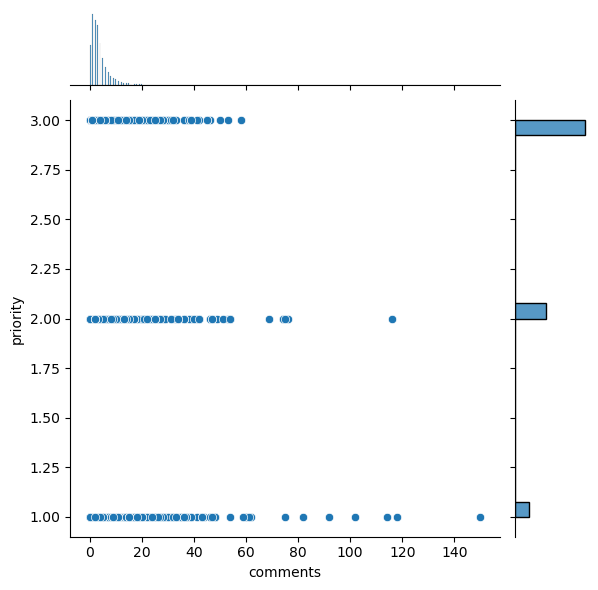

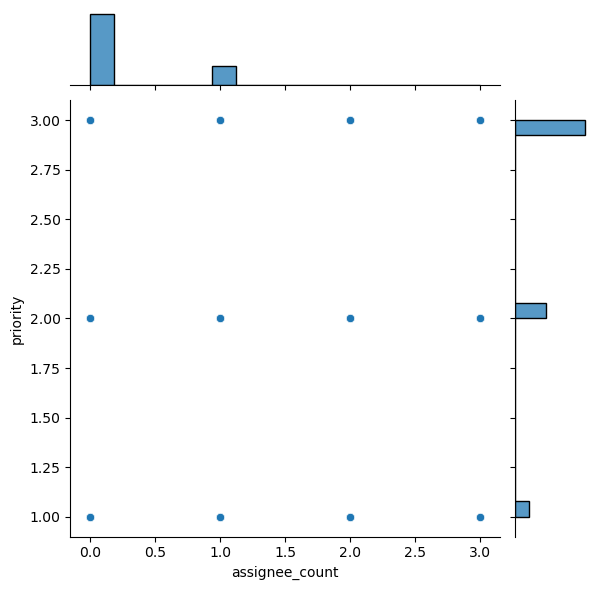

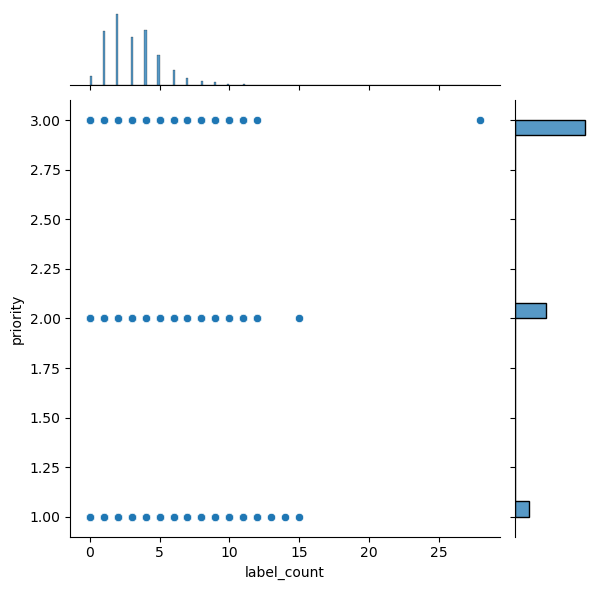

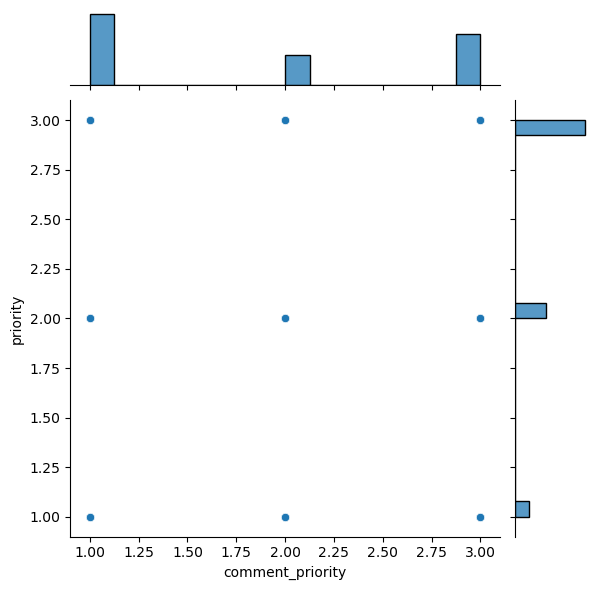

In [19]:
sns.jointplot(x='comments',y='priority',data=df)
sns.jointplot(x='assignee_count',y='priority',data=df)
sns.jointplot(x='label_count',y='priority',data=df)
sns.jointplot(x='comment_priority',y='priority',data=df)

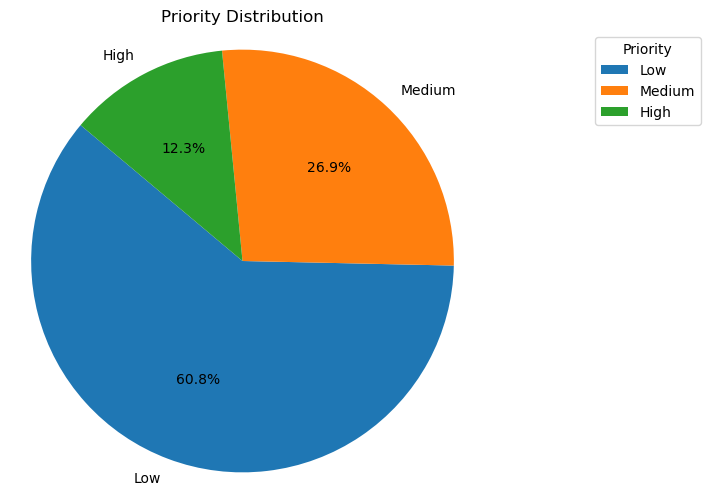

In [17]:
import matplotlib.pyplot as plt

priority_labels = {
    1: 'High',
    2: 'Medium',
    3: 'Low'
}
priority_counts = df['priority'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(priority_counts, labels=priority_counts.index.map(priority_labels), autopct='%1.1f%%', startangle=140)
plt.title('Priority Distribution')
plt.axis('equal')  
plt.legend(title="Priority", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()



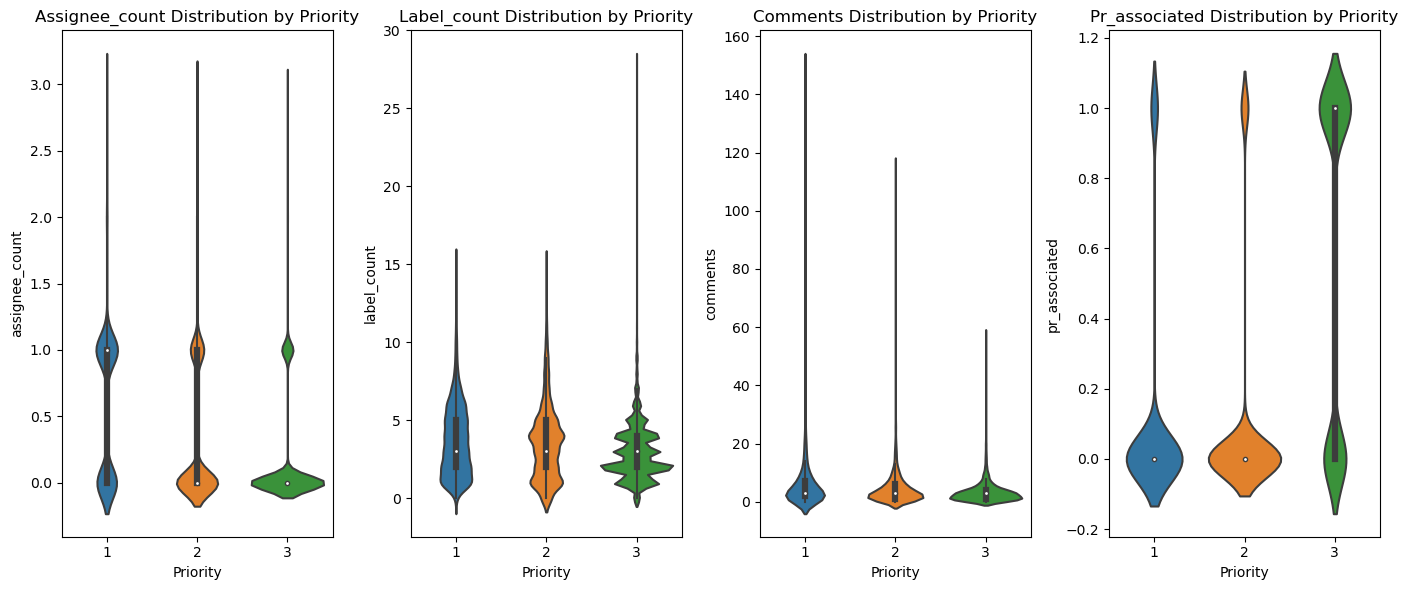

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the numerical variables
numerical_vars = ['assignee_count', 'label_count', 'comments', 'pr_associated']

# Create violin plots
plt.figure(figsize=(14, 6))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(1, 4, i)
    sns.violinplot(data=df, x='priority', y=var)
    plt.title(f'{var.capitalize()} Distribution by Priority')
    plt.xlabel('Priority')
    plt.ylabel(var)

plt.tight_layout()
plt.show()


In [19]:
plt.figure(figsize=(8, 4))
sns.violinplot(data=df, x='priority', y='comments')
plt.title('Comments Distribution by Priority')
plt.xlabel('Priority')
plt.ylabel('Number of Comments')
plt.show()

In [21]:
priority_comments = df.groupby('priority')['comments'].sum().reset_index()
plt.figure(figsize=(8, 4))
sns.barplot(data=priority_comments, x='priority', y='comments')
plt.title('Total Comments by Priority')
plt.xlabel('Priority')
plt.ylabel('Total Comments')
plt.show()

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the numerical variables
numerical_vars = ['assignee_count', 'label_count', 'comments', 'pr_associated']

# Create boxplots
plt.figure(figsize=(12, 8))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='priority', y=var, data=df)
    plt.title(f'{var} by Priority')
    plt.xlabel('Priority')
    plt.ylabel(var)

plt.tight_layout()
plt.show()


C:\Users\Akshat tyagi\AppData\Local\Temp\ipykernel_21696\895144745.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['priority'])


<Axes: xlabel='priority', ylabel='Density'>

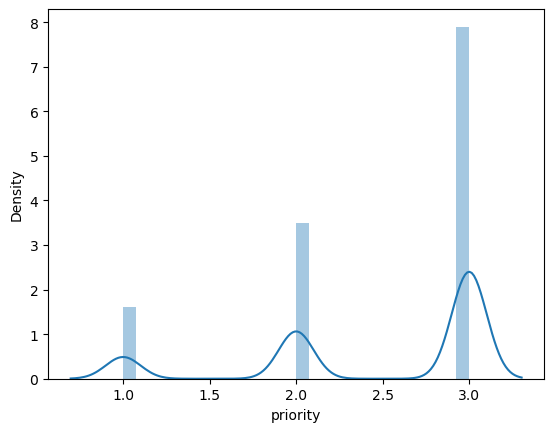

In [10]:
sns.distplot(df['priority'])

In [20]:
tc=df.corr()

In [21]:
sns.heatmap(tc, cmap='viridis')

<Axes: >

In [22]:
plt.figure(figsize=(15, 10))
g = sns.FacetGrid(data=df, col='label_count', col_wrap=4, height=5)
g.map(plt.hist, 'priority', bins=30, color='blue', alpha=0.6)
g.set_axis_labels('Priority', 'Frequency')
g.set_titles('Label Count: {col_name}')
plt.tight_layout()
plt.show()


<Figure size 1500x1000 with 0 Axes>

In [23]:
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected = True)
cf.go_offline()
import chart_studio.plotly as py

In [24]:
df.iplot()

In [25]:
df[['comments','priority']].iplot(kind='spread')

C:\Users\Akshat tyagi\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:849: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.

C:\Users\Akshat tyagi\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.

